# Imports

In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Importing csv data into dataframes
djs_df = pd.read_csv('../data/djs_dataframe.csv')
djs_hot_df = pd.read_csv('../data/djs_hot_posts_df.csv')
djs_new_df = pd.read_csv('../data/djs_new_posts_df.csv')
djs_top_df = pd.read_csv('../data/djs_top_posts_df.csv')
djs_rising_df = pd.read_csv('../data/djs_rising_posts_df.csv')
musicians_df = pd.read_csv('../data/musicians_dataframe.csv')
musicians_hot_df = pd.read_csv('../data/musicians_hot_posts_df.csv')
musicians_new_df = pd.read_csv('../data/musicians_new_posts_df.csv')
musicians_top_df = pd.read_csv('../data/musicians_top_posts_df.csv')
musicians_rising_df = pd.read_csv('../data/musicians_rising_posts_df.csv')

# Dataframe(s) and Cleaning

**Concatenating 4 "PRAWed" djs dataframes**

In [ ]:
djs_data = pd.concat([djs_hot_df, djs_top_df, djs_new_df, djs_rising_df])

**Concatenating 4 "PRAWed" musicians dataframes**

In [ ]:
musicians_data = pd.concat([musicians_hot_df, musicians_top_df, musicians_new_df, musicians_rising_df])

**Dropping Select Columns**

In [ ]:
# Defining columns to drop
cols_to_drop = [col for col in djs_hot_df.columns if col not in ['subreddit', 'body', 'num_comments', 'score', 'title']]

In [ ]:
# Dropping unnecessary columns
djs_data.drop(columns = cols_to_drop, inplace = True)
musicians_data.drop(columns = cols_to_drop, inplace = True)

**Dropping Duplicates**

In [ ]:
djs_data.shape, musicians_data.shape

In [ ]:
djs_data.drop_duplicates(inplace = True)
musicians_data.drop_duplicates(inplace = True)

**Inspecting**

In [ ]:
djs_data.info()

In [ ]:
musicians_data.info()

In [ ]:
djs_data.head()

In [ ]:
musicians_data.head()

**Concatenating musicians_data and djs_data into single master dataframe and exporting**  

In [ ]:
master = pd.concat([musicians_data, djs_data])

In [ ]:
master.to_csv('../data/master.csv')

**Creating seperate dataframes for titles and bodies**

In [ ]:
titles = master.copy()
titles.drop(axis = 1, labels = ['body'], inplace = True)
titles.to_csv('../data/titles.csv')

In [ ]:
bodies = master.copy()
bodies.drop(axis = 1, labels = ['title'], inplace = True)
bodies.dropna(inplace = True)
bodies.to_csv('../data/bodies.csv')

# PreProcessing with SpaCy

**Instantiating Spacy Model**

In [ ]:
# Instantiating the spacy model
nlp = spacy.load('en_core_web_md')

**Creating a spacy function with .apply() to apply the spacy preprocessing pipeline to a whole column in dataframes**

In [ ]:
def spacy_processor(text):
    
    #Puting the data into spaCy model
    doc = nlp(text)
    
    # List comprehension involving Tokenizing, Lemmatizing, keeping alphabetical words only, filtering out stop words, filtering out punctuation, filtering out digits, making sure no single letters/characters. 
    tokens = [token.lemma_.lower().strip() for token in doc if token.is_alpha and not token.is_stop and not token.is_punct and not token.is_digit and len(token.text) > 1]

    #Putting the processed text back together with a space between them
    processed_text = ' '.join(tokens)

    #Returning processed text
    return processed_text

Source - Primarily leaned on exploration of spaCy with Hackathon team Myself, [Kristina Halbig](https://www.linkedin.com/in/khalbig/) and [Radha Mohanty](https://www.linkedin.com/in/radha-mohanty-csm-cspo-ms-177220ba/) as a team with guidance on function usage by Hank Butler. 

[source](https://spacy.io/usage/spacy-101#pipelines)

[source](https://spacy.io/usage/spacy-101#training)

[source](https://www.linkedin.com/in/hankabutler/)

**Applying the function to the titles and bodies textdataframes, and exporting**

In [ ]:
titles['processed_title'] = titles['title'].apply(spacy_processor)

In [ ]:
titles.to_csv('../data/titles.csv')

In [ ]:
bodies['processed_body'] = bodies['body'].apply(spacy_processor)

In [ ]:
bodies.to_csv('../data/bodies.csv')

# Exploratory Data Analysis

In [109]:
# creating a dataframe especially for data analysis
eda = master.copy()

In [111]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4430 entries, 0 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4430 non-null   object
 1   score         4430 non-null   int64 
 2   subreddit     4430 non-null   object
 3   num_comments  4430 non-null   int64 
 4   body          2754 non-null   object
dtypes: int64(2), object(3)
memory usage: 207.7+ KB


In [153]:
# Number of musicians entries 
len(eda[eda['subreddit']=='musicians'])

2136

In [154]:
# Number of DJs entries
len(eda[eda['subreddit']=='DJs'])

2294

In [112]:
# creating a processed title column
eda['processed_title'] = eda['title'].apply(spacy_processor)

## titles

**Looking at word count**

In [219]:
# Creating a title_word_count column
eda['title_word_count'] = [len(title.split()) for title in eda['title']]
eda

,title,score,subreddit,num_comments,body,processed_title,title_word_count
0,How many of you guys play multiple instruments?,12,musicians,107,I sort of assume that's just the norm?,guy play multiple instrument,8
1,I started guitar at 33 & I am now looking back...,16,musicians,33,NaN,start guitar look impressed progress year stop...,39
2,Tell me about the first time you got on stage ...,40,musicians,67,"I started learning guitar around 10 years old,...",tell time get stage want hear especially singer,18
3,Think less about what fans can do for you:,14,musicians,2,Balancing self-expression with serving your au...,think fan,9
4,“Feeling the music”,11,musicians,26,In college my buddy and I took a music perform...,feel music,3
...,...,...,...,...,...,...,...
11,Xone 96 or Xone 92 20th?,6,DJs,38,\n\nWith the release of the 20th-anniversary e...,xone xone,6
16,PSA to clean out your playlists/collection (al...,11,DJs,5,"This is obviously basic info, but I've been do...",psa clean playlist collection hit organization...,13
18,Study: Shifts in song lyrics in the last 4 dec...,92,DJs,46,"My fellow music nerds, listen up:\n\nThis rece...",study shift song lyric decade,10
19,"First time flying with a flight case, any tips...",11,DJs,40,Any tips for traveling with a flight case?\n\n...,time fly flight case tip thing think,15


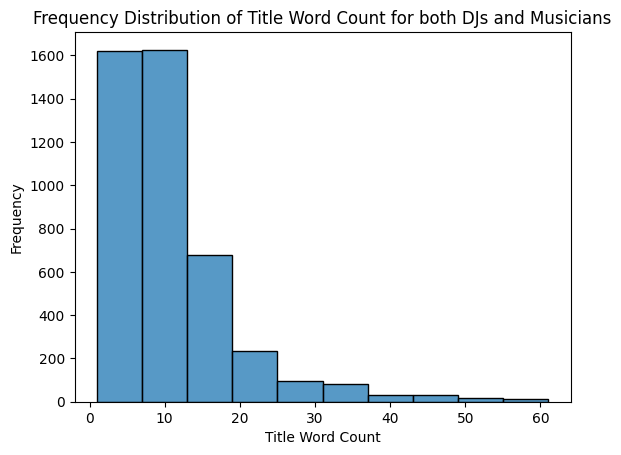

In [220]:
# Visualizing word count distribution of titles for both DJ's and Musicians to get a general sense of how long posts were on average
sns.histplot(data=eda, x='title_word_count', multiple="stack", bins=10)

# Adding labels and title
plt.xlabel('Title Word Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Title Word Count for both DJs and Musicians')

# Show plot
plt.show()

In [221]:
# Summarizing word count distribution of titles for both DJ's and Musicians seperately for comparison. 
eda.groupby('subreddit')[['title_word_count']].describe()

title_word_count                                                
                     count       mean       std  min  25%  50%   75%   max
subreddit                                                                 
DJs                 2294.0  10.078030  7.977920  1.0  5.0  8.0  13.0  60.0
musicians           2136.0  10.906835  8.842003  1.0  5.0  9.0  13.0  61.0

**Looking at Top Occuring Words**

For r/DJs...

In [190]:
# data on titles for DJ's and Musicians 

djs_titles = titles[titles['subreddit']=='DJs']

musicians_titles = titles[titles['subreddit'] =='musicians']

In [191]:
#Instantiate a count vectorizer 
cvec_djs_titles = CountVectorizer()

In [192]:
cvec_djs_titles.fit(djs_titles['processed_title'])

CountVectorizer()

In [193]:
vectorized_djs_processed_titles = cvec_djs_titles.transform(djs_titles['processed_title'])

In [195]:
vectorized_djs_processed_titles_df = pd.DataFrame(vectorized_djs_processed_titles.todense(),
                                                  columns = cvec_djs_titles.get_feature_names_out())

Text(0.5, 1.0, 'Occurences of the top 25 most frequently occuring words in r/DJs subreddit titles')

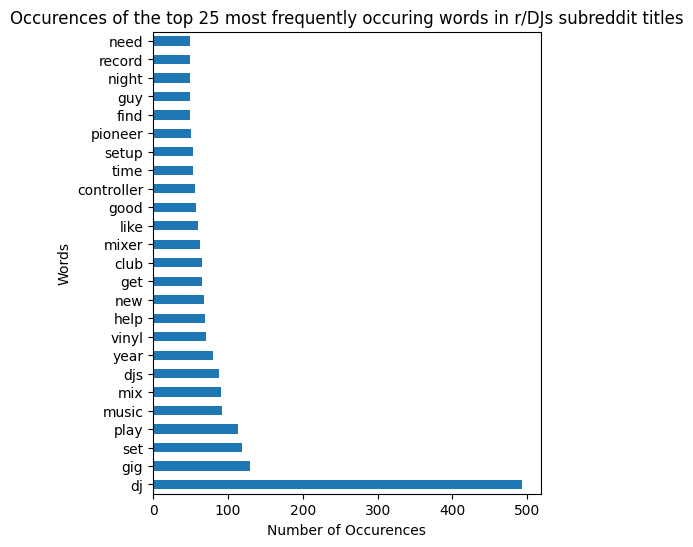

In [212]:
# Plotting top 25 occuring words
figure = plt.figure(figsize = (5,6))
vectorized_djs_processed_titles_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh')
plt.xlabel('Number of Occurences')
plt.ylabel('Words')
plt.title('Occurences of the top 25 most frequently occuring words in r/DJs subreddit titles')

For r/musicians...

In [213]:
#Instantiate a count vectorizer 
cvec_musicians_titles = CountVectorizer()

In [214]:
cvec_musicians_titles.fit(musicians_titles['processed_title'])

CountVectorizer()

In [215]:
vectorized_musicians_processed_titles = cvec_musicians_titles.transform(musicians_titles['processed_title'])

In [216]:
vectorized_musicians_processed_titles_df = pd.DataFrame(vectorized_musicians_processed_titles.todense(),
                                                  columns = cvec_musicians_titles.get_feature_names_out())

Text(0.5, 1.0, 'Occurences of the top 25 most frequently occuring words in r/musicians subreddit titles')

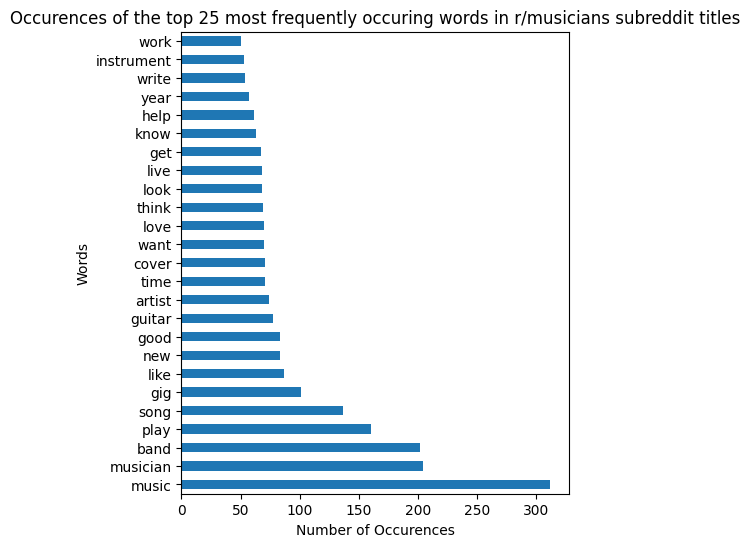

In [239]:
# Plotting top 25 occuring words
figure = plt.figure(figsize = (5,6))
vectorized_musicians_processed_titles_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh')
plt.xlabel('Number of Occurences')
plt.ylabel('Words')
plt.title('Occurences of the top 25 most frequently occuring words in r/musicians subreddit titles')

## bodies

In [218]:
bodies

,score,subreddit,num_comments,body,processed_body
0,12,musicians,107,I sort of assume that's just the norm?,sort assume norm
2,40,musicians,67,"I started learning guitar around 10 years old,...",start learn guitar year old play coward hate e...
3,14,musicians,2,Balancing self-expression with serving your au...,balance self expression serve audience crucial...
4,11,musicians,26,In college my buddy and I took a music perform...,college buddy take music performance class tea...
6,1,musicians,0,A band that was on my cover wishlist for a lon...,band cover wishlist long time mercyful fate ma...
...,...,...,...,...,...
11,6,DJs,38,\n\nWith the release of the 20th-anniversary e...,release anniversary edition boast enhancement ...
16,11,DJs,5,"This is obviously basic info, but I've been do...",obviously basic info housekeeping rekordbox re...
18,92,DJs,46,"My fellow music nerds, listen up:\n\nThis rece...",fellow music nerd listen recent study analyze ...
19,11,DJs,40,Any tips for traveling with a flight case?\n\n...,tip travel flight case safe pack xlr cable mic...


In [224]:
# Creating a body_word_count column
bodies['body_word_count'] = [len(body.split()) for body in bodies['body']]
bodies

,score,subreddit,num_comments,body,processed_body,body_word_count
0,12,musicians,107,I sort of assume that's just the norm?,sort assume norm,8
2,40,musicians,67,"I started learning guitar around 10 years old,...",start learn guitar year old play coward hate e...,351
3,14,musicians,2,Balancing self-expression with serving your au...,balance self expression serve audience crucial...,161
4,11,musicians,26,In college my buddy and I took a music perform...,college buddy take music performance class tea...,258
6,1,musicians,0,A band that was on my cover wishlist for a lon...,band cover wishlist long time mercyful fate ma...,251
...,...,...,...,...,...,...
11,6,DJs,38,\n\nWith the release of the 20th-anniversary e...,release anniversary edition boast enhancement ...,29
16,11,DJs,5,"This is obviously basic info, but I've been do...",obviously basic info housekeeping rekordbox re...,259
18,92,DJs,46,"My fellow music nerds, listen up:\n\nThis rece...",fellow music nerd listen recent study analyze ...,95
19,11,DJs,40,Any tips for traveling with a flight case?\n\n...,tip travel flight case safe pack xlr cable mic...,27


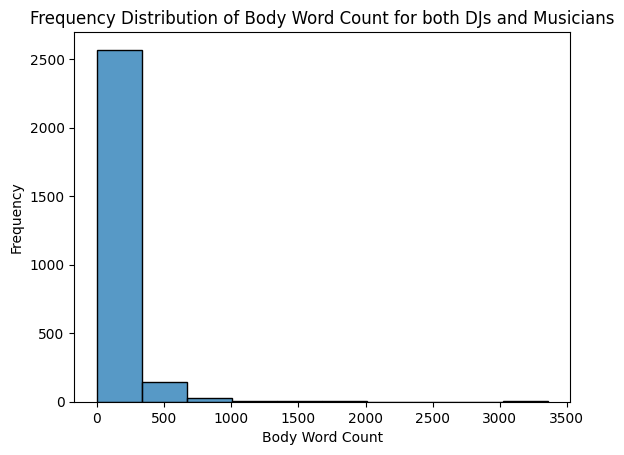

In [225]:
# Visualizing word count distribution of bodies for both DJ's and Musicians to get a general sense of how long posts were on average
sns.histplot(data=bodies, x='body_word_count', multiple="stack", bins=10)

# Adding labels and title
plt.xlabel('Body Word Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Body Word Count for both DJs and Musicians')

# Show plot
plt.show()

In [226]:
# Summarizing word count distribution of bodies \for both DJ's and Musicians seperately for comparison. 
bodies.groupby('subreddit')[['body_word_count']].describe()

body_word_count                                                  \
                    count        mean         std  min   25%   50%    75%   
subreddit                                                                   
DJs                1412.0  135.410057  175.739014  1.0  45.0  87.5  156.0   
musicians          1342.0  135.336811  200.770677  0.0  43.0  87.0  168.0   

                   
              max  
subreddit          
DJs        1903.0  
musicians  3358.0

**Looking at Top Occuring Words**

For r/DJs...

In [228]:
# data on titles for DJ's and Musicians 

djs_bodies = bodies[bodies['subreddit']=='DJs']

musicians_bodies = bodies[bodies['subreddit'] =='musicians']

In [229]:
#Instantiate a count vectorizer 
cvec_djs_bodies = CountVectorizer()

In [230]:
cvec_djs_bodies.fit(djs_bodies['processed_body'])

CountVectorizer()

In [231]:
vectorized_djs_processed_bodies = cvec_djs_bodies.transform(djs_bodies['processed_body'])

In [232]:
vectorized_djs_processed_bodies_df = pd.DataFrame(vectorized_djs_processed_bodies.todense(),
                                                  columns = cvec_djs_bodies.get_feature_names_out())

Text(0.5, 1.0, 'Occurences of the top 25 most frequently occuring words in r/DJs subreddit bodies')

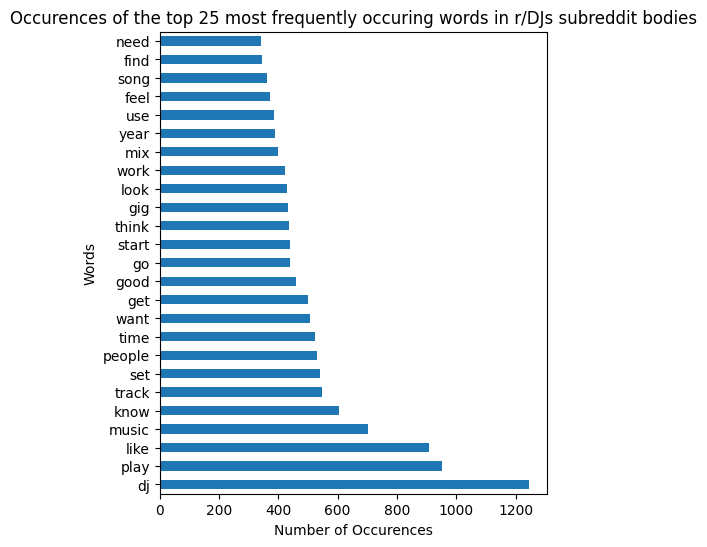

In [233]:
# Plotting top 25 occuring words
figure = plt.figure(figsize = (5,6))
vectorized_djs_processed_bodies_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh')
plt.xlabel('Number of Occurences')
plt.ylabel('Words')
plt.title('Occurences of the top 25 most frequently occuring words in r/DJs subreddit bodies')

For r/musicians...

In [234]:
#Instantiate a count vectorizer 
cvec_musicians_bodies = CountVectorizer()

In [235]:
cvec_musicians_bodies.fit(musicians_bodies['processed_body'])

CountVectorizer()

In [236]:
vectorized_musicians_processed_bodies = cvec_musicians_bodies.transform(musicians_bodies['processed_body'])

In [237]:
vectorized_musicians_processed_bodies_df = pd.DataFrame(vectorized_musicians_processed_bodies.todense(),
                                                  columns = cvec_musicians_bodies.get_feature_names_out())

Text(0.5, 1.0, 'Occurences of the top 25 most frequently occuring words in r/musicians subreddit bodies')

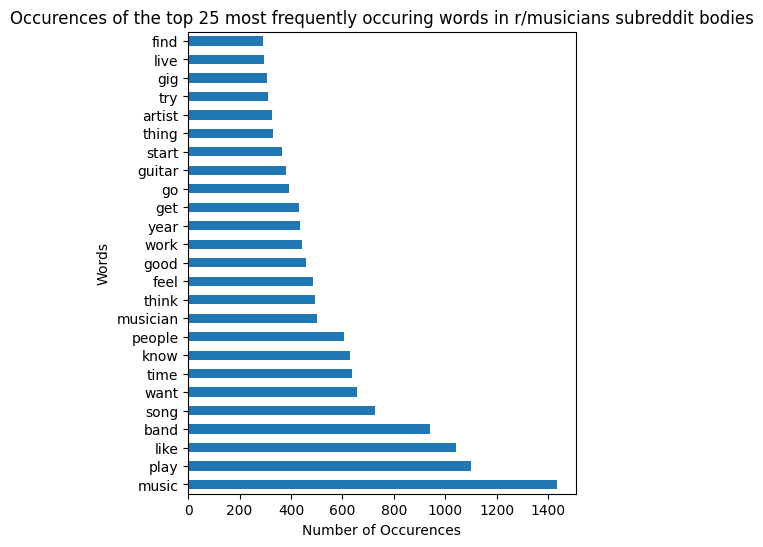

In [240]:
# Plotting top 25 occuring words
figure = plt.figure(figsize = (5,6))
vectorized_musicians_processed_bodies_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh')
plt.xlabel('Number of Occurences')
plt.ylabel('Words')
plt.title('Occurences of the top 25 most frequently occuring words in r/musicians subreddit bodies')